## Rapport

In [14]:
import matplotlib.pyplot as plt
import pandas as pd;

In [15]:
def get_graph(path, ty, suffix):
    random_data = pd.read_csv(path, quotechar='"', skipinitialspace=True)
    data = random_data[random_data.columns.drop("Vector size")]
    print(random_data)  

    plt.figure()
    x = random_data["Vector size"]
    plt.plot(x, data, marker="o")

    plt.yscale('log')
    plt.xlabel('Vector size')
    plt.ylabel('Execution time (μs)')
    plt.xscale('log')
    plt.title(suffix + " - " + ty)
    plt.grid(True)
    plt.legend(random_data.columns.drop("Vector size")
        .map(lambda val : val + " ("+ suffix + ")"))

    plt.savefig("out/" + suffix + "_" +  ty + ".svg")

   Vector size   Bubble  Insertion  Selection  StdSort  StdStableSort
0           50       34         18         18        5              6
1          100      144         68         69       11             14
2          500     3406       1600       1659       77             81
3         1000    14159       6257       6447      158            185
4         5000   347491     166302     160044      957           1097
5        10000  1387766     687430     655119     2061           2235


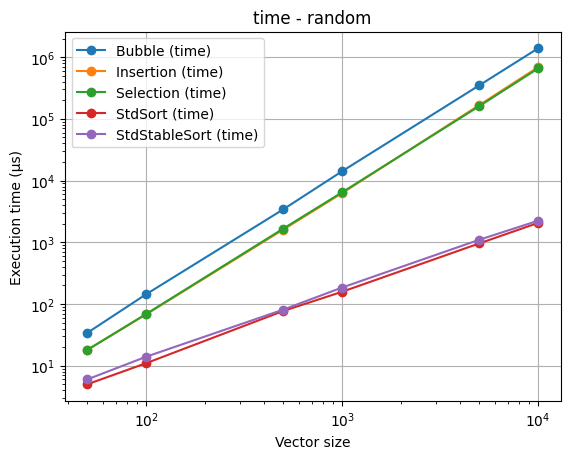

In [16]:
get_graph("part2/Random.csv", "random", "time")

   Vector size   Bubble  Insertion  Selection  StdSort  StdStableSort
0           50       39         33         17        3              6
1          100      155        129         66        7             10
2          500     4377       3850       1573       36             53
3         1000    17305      13277       6382       77            112
4         5000   398365     331221     161019      494            620
5        10000  1587019    1334958     662057     1027           1266


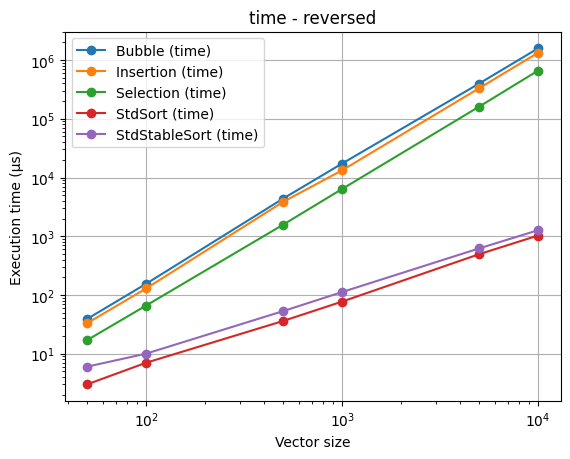

In [17]:
get_graph("part2/Reversed.csv", "reversed", "time")

   Vector size   Bubble  Insertion  Selection  StdSort  StdStableSort
0           50       37          2         31        7              7
1          100      152          3        115       13             32
2          500     3148         12       2052       52             55
3         1000    12514         29       8287      129            138
4         5000   298287        100     204975     1161            753
5        10000  1021909        198     689763     1245           1021


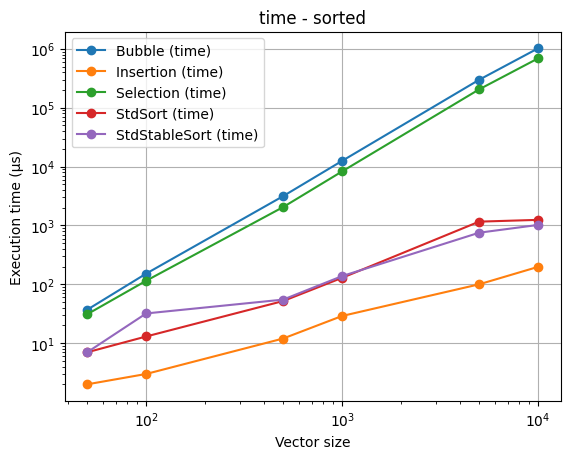

In [18]:
get_graph("part2/Sorted.csv", "sorted", "time")

   Vector size  Bubble  Insertion  Selection  StdSort  StdStableSort
0           50      25          4         18        4              6
1          100      97         10         67        9             10
2          500    2404        193       1618       60             70
3         1000    9754        727       6424      132            166
4         5000  247531      17549     160316     1233           1265
5        10000  988249      71007     650283     1789           2143


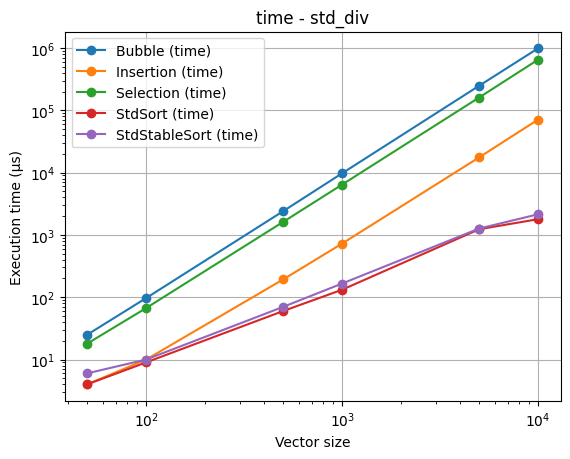

In [19]:
get_graph("part2/Std Deviation.csv", "std_div", "time")

# Part 3: Ops
To make it easier for us, we are splitting it into two parts, one for the assingations, the other for comparisons, and a third for combined, with the following formula:
$$
\text{Value} = \text{Comparisons} + \text{Assigns} * 10 
$$

In [20]:
def parse(path, type):
    random_data = pd.read_csv(path, quotechar='"', skipinitialspace=True)
    columns = [r for r in random_data.columns if type in r or r == "Vector size"]
    return random_data.filter(items=columns, axis=1).rename(lambda val: val.split('_')[0], axis='columns')

parse("part3/Random.csv", "comp")

,Vector size,Bubble,Insertion,Selection,StdSort,StdStableSort
0,50,1225,668,1225,321,236
1,100,4950,2627,4950,736,616
2,500,124750,62209,124750,5252,4310
3,1000,499500,241423,499500,11694,9735
4,5000,12497500,6249515,12497500,78013,58942
5,10000,49995000,25033276,49995000,164743,128035


In [21]:

def graph(data, vec_type, type):
    lut = {'copy': "Copy count", 'comp': "Comparisons count"}
    plt.figure()
    x = data["Vector size"]
    plt.plot(x, data[data.columns.drop("Vector size")], marker = 'o')

    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Vector size')
    plt.ylabel(lut[type])
    plt.title(lut[type] + " - " + vec_type)
    plt.grid(True)
    plt.legend(data.columns.drop("Vector size").map(lambda val : val + " ("+ type + ")"))

    plt.savefig("out/" + type + "_" + vec_type + ".svg")

In [22]:
def generate(path, vectype):
    data_comp = parse(path, "comp")
    graph(data_comp, vectype, "comp")

    data_copy = parse(path, "copy")
    graph(data_copy, vectype, "copy")

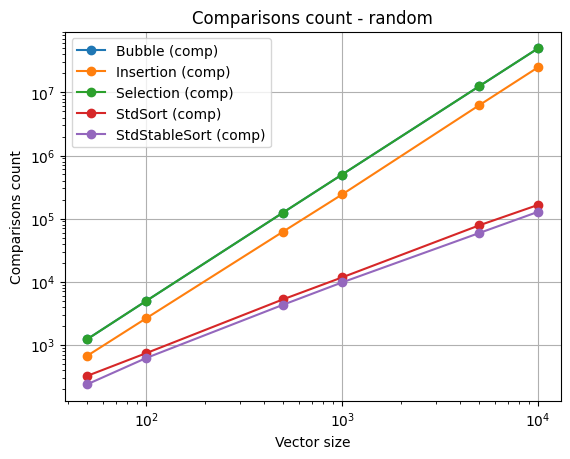

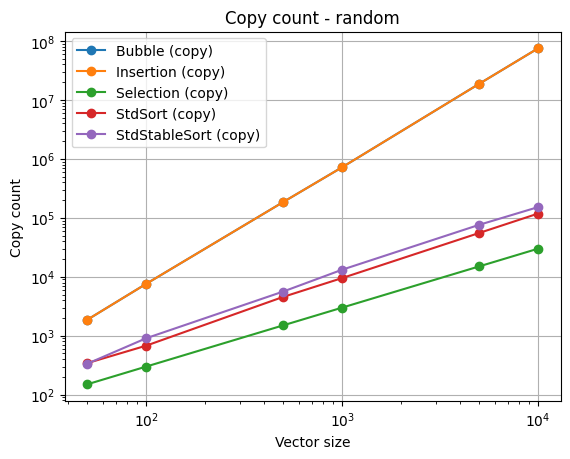

In [23]:
generate("part3/Random.csv", "random")

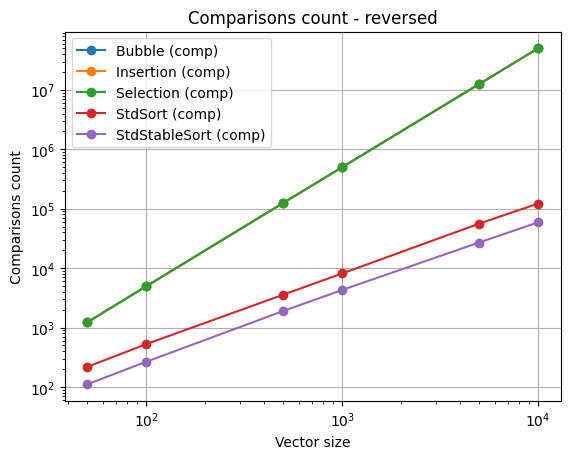

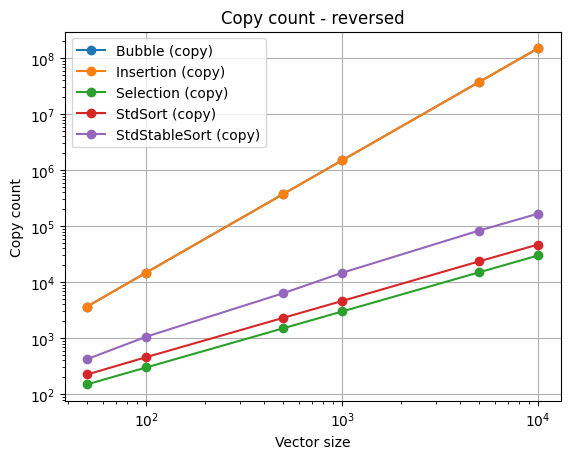

In [24]:
generate("part3/Reversed.csv", "reversed")

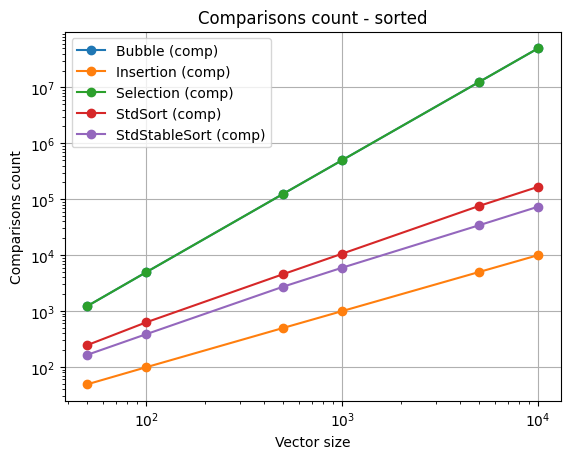

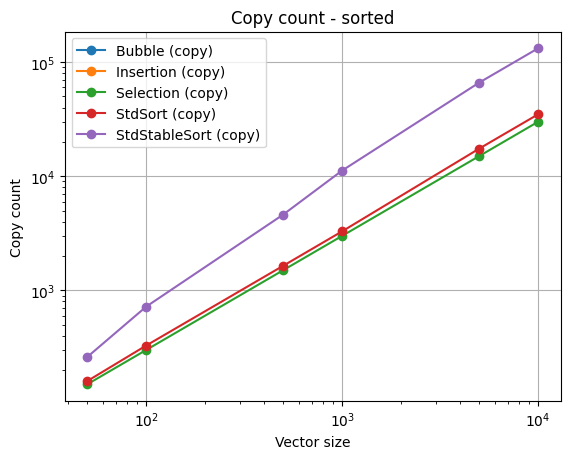

In [25]:
generate("part3/Sorted.csv", "sorted")

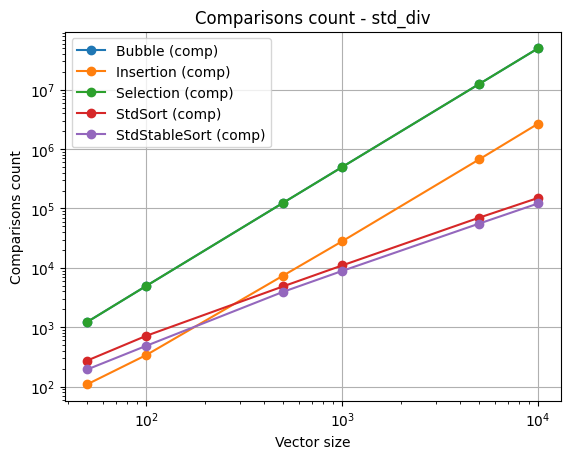

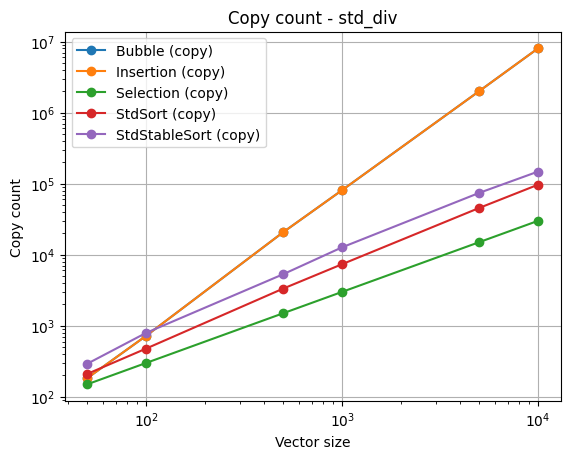

In [26]:
generate("part3/Std Deviation.csv", "std_div")